# 시각화 모듈 추가

In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.


In [ ]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

import warnings
warnings.filterwarnings('ignore')

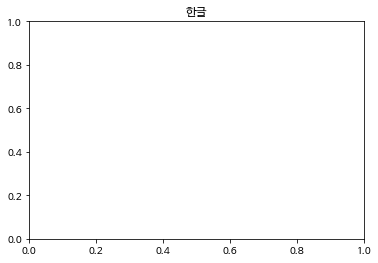

In [ ]:
plt.title('한글')
plt.show()

# **해결문제**


---
+ 도로교통공단 TAAS 시스템에서 제공하는 교통사고 발생추세 자료를 이용하여 문제를 정의하고 데이터를 분석하시오.
+ 참고사이트 : http://taas.koroad.or.kr/sta/acs/exs/typical.do?menuId=WEB_KMP_OVT_UAS_TAT

# **pandas**


---


## **파이썬에서 사용하는 데이터분석 라이브러리**
 + 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
 + NumPy를 기반으로 구축되었으며 과학 컴퓨팅 환경 내에서 다른 많은 타사 라이브러리와 잘 통합되도록 설계 
 + 많은 기능을 가진 데이터 구조
   - 다양한 방식으로 색인된 데이터를 다룰 수 있는 기능
   - 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
   - 누락된 데이터를 유연하게 처리할 수 있는 기능
   - SQL 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# **판다스 외부 데이터 가져오기**
+ csv 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_csv(‘파일명‘, engine='python')
 - 파일 내용 한글이 깨지는 경우 : df = pd.read_csv(‘파일명‘, engine='python', encoding='cp949')
>
```
df = pd.read_csv(‘파일명‘)
```

+ 엑셀 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_excel(‘파일명‘)
>
```
df = pd.read_excel(‘파일명‘)
```

In [ ]:
#교통사고 데이터 불러오기
data = pd.read_excel('/content/drive/MyDrive/데이터 분석/교통사고추세.xls')

## 데이터프레임(DataFrame) 살펴보기
* 데이터프레임의 정보 : **df.info()**
 - 데이터프레임에 대한 전반적인 정보
 - 데이터프레임을 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력
+ 데이터프레임의 크기 확인 : **df.shape 속성**
 - (행, 열) 크기를 확인하기
 - 행의 개수 : len(데이터프레임), len(.index), .shape[0]
 - 열의 개수 : len(.column), .shape[1]
+ 데이터프레임의 원소의 총개수 : **df.size 속성**
+ 데이터프레임 개수 확인 :**df.count()**
 - Null이 아닌 행의 개수 확인
 - axis='columns' : Null이 아닌 열의 개수 확인
* 데이터프레임의 인덱스 
 + 열의 인덱스 : **df.colums**
 + 행의 인덱스 : **df.index**
 + **데이터프레임의 인덱스 변경**
   - 열인덱스 명 변경 : df.column = [열명인덱스]
   - 열항목 중 하나를 인덱스로 사용 : df.set_index(열명)
   - 인덱스를 일반 데이터 열로 전환 : df.reset_index()
   - 데이터프레임의 행/열 인덱스를 새로운 배열로 재지정 : df.reindex([])

In [ ]:
# 데이터프레임 정보 확인
data.info()

In [ ]:
# 데이터프레임 열인덱스 확인
data.columns


In [ ]:
# 데이터프레임 열인덱스 변경
data.columns = ['분석지표', '구분', '2016', '2017', '2018', '2019',  '2020']

# 변경확인
data.head()

## **조건에 맞는 자료 추출**
+ df[조건식]
  + 시리즈.isin([리스트])
    + 부정은 조건식 앞에 ~
  + and 연산 : &
  + or 연산 : | 
  + and 연산이나 or연산인 경우는 반드시 ()로 묶어서 사용

In [ ]:
#구분이 전체인 데이터 추출
#data[(data['구분'] == '전체') & (data['분석지표'] == '사망자수')]
df = data[data['구분'] == '전체']

In [ ]:
#행과 열 전환
df = df.T
df
 

## **데이터프레임 추출하기**
+ 열자료 가져오기 : df[]
 + 특정 열 가져오기 : df[열인덱스], df[열인덱스 리스트]
 + 특정 행 가져오기 : df[시작행인덱스:종료행인덱스] 

+ 인덱스명으로 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]
  * 특정 열 가져오기 : df.loc[:, 열인덱스]
  * 특정 행 가져오기 : df.loc[행인덱스, :]
  * 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]

+ 인덱스 위치값으로 특정 항목 가져오기 : df.iloc[행인덱스순서, 열인덱스순서]
  * 특정 열 가져오기 : df.iloc[:, 열인덱스순서]
  * 특정 행 가져오기 : df.iloc[행인덱스순서, :]
  * 특정 항목 가져오기 : df.iloc[행인덱스순서, 열인덱스순서]

In [ ]:
#열명에 해당하는 행자료를 리스트로 만들기
col = list(df.iloc[0, :])

In [ ]:
#연도별 자료만 가져오기
df = df.iloc[2:, :]
df

In [ ]:
#열명 변경
df.columns = col
df

## 열 추출 및 생성
 + 특정 열 가져오기 : df[열인덱스], df[열인덱스 리스트]
 + 새로운 열 생성 : df['새로운열명'] = 시리즈데이터

In [ ]:
#치명율과 부상율 구하기
df['치명율'] = df['사망자수'] / df['사고건수'] * 100
df['부상자율'] = df['부상자수'] / df['사고건수']
df

In [ ]:
#그래프 그리기
df[['사고건수','사망자수','부상자수']].plot(marker = 'o')
plt.title('교통사고')
plt.show() 

In [ ]:
#그래프 그리기
df[['치명율','부상자율']].plot.bar()
plt.title('치명률 & 부상자율')
plt.axhine(y=1.5, color = 'r', ls)
plt.show() 